# Sparkify analytics

This notebook demonstrates how to
* read parquet files from S3 storage into datafarames
* create views and make SQL queries on these for insight
* plot the results using matplotlib

PySpark EMR notebooks do not have pandas and matplotlib pre-installed, so we need to install them using the `install_pypi_package` function found in *SparkContext*.

In [1]:
sc.install_pypi_package("pandas")
sc.install_pypi_package("matplotlib")

VBox()

Starting Spark application


ID,YARN Application ID,Kind,State,Spark UI,Driver log,Current session?
3,application_1586238385395_0004,pyspark,idle,Link,Link,✔


FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

SparkSession available as 'spark'.


FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

  Using cached pandas-1.0.3-cp36-cp36m-manylinux1_x86_64.whl (10.0 MB)
  Using cached python_dateutil-2.8.1-py2.py3-none-any.whl (227 kB)

  Using cached matplotlib-3.2.1-cp36-cp36m-manylinux1_x86_64.whl (12.4 MB)
  Using cached pyparsing-2.4.7-py2.py3-none-any.whl (67 kB)
  Using cached kiwisolver-1.2.0-cp36-cp36m-manylinux1_x86_64.whl (88 kB)
  Using cached cycler-0.10.0-py2.py3-none-any.whl (6.5 kB)

Declare the imports we'll be utilizing in the notebook

In [2]:
import os
import datetime as dt
import matplotlib.pyplot as plt
import pandas as pd

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

## Read data into DataFrames

Next we will read all the tables from the storage into dataframes, print their schema and top rows to get a better view of the video.

The tables to load are:
* songs
* artists
* users
* time
* songplays

In [3]:
bucket_base_path = "s3://dend-tomra/sparkify/analytics"

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

In [4]:
df_songs = spark.read.parquet(os.path.join(bucket_base_path, "songs"))
df_songs.printSchema()
df_songs.show(5)

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

root
 |-- song_id: string (nullable = true)
 |-- title: string (nullable = true)
 |-- duration: double (nullable = true)
 |-- year: integer (nullable = true)
 |-- artist_id: string (nullable = true)

+------------------+--------------------+---------+----+------------------+
|           song_id|               title| duration|year|         artist_id|
+------------------+--------------------+---------+----+------------------+
|SOVVCEK12A6D4F6373|Everything You Al...|165.98159|   0|ARRL7WS1187FB576F1|
|SOVUIHM12A8C13E3AB|Symphony No. 3 in...|458.08281|   0|AR820DX11C8A4157C3|
|SOCHPTV12A6BD53113|Die Kunst der Fug...|172.38159|   0|ARN8NCB1187FB49652|
|SOMZGJO12A8C13676E|Stomp Remix (feat...|206.96771|   0|ARRFBPZ1187B9B8263|
|SOMXTYR12A6D4FA639|Creating Somethin...|382.04036|   0|ARQ5W4H1187B99E4A4|
+------------------+--------------------+---------+----+------------------+
only showing top 5 rows

In [5]:
df_artists = spark.read.parquet(os.path.join(bucket_base_path, "artists"))
df_artists.printSchema()
df_artists.show(5)

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

root
 |-- artist_id: string (nullable = true)
 |-- name: string (nullable = true)
 |-- location: string (nullable = true)
 |-- latitude: double (nullable = true)
 |-- longitude: double (nullable = true)

+------------------+--------------------+--------------------+--------+----------+
|         artist_id|                name|            location|latitude| longitude|
+------------------+--------------------+--------------------+--------+----------+
|AR6PJ8R1187FB5AD70|Shakira Featuring...|Barranquilla, Col...|    null|      null|
|ARVKQUH121318C5AD2|The Watts 103rd. ...|                    |    null|      null|
|AR10USD1187B99F3F1|         Silverstein|Burlington, Ontar...|    null|      null|
|ARERLPG1187FB3BB39|           Tom Waits|          Pomona, CA|34.05464|-117.75002|
|AR225QF1187B9B351E|      Bernhard Brink|            Kent, OH|41.15093| -81.35822|
+------------------+--------------------+--------------------+--------+----------+
only showing top 5 rows

In [6]:
df_users = spark.read.parquet(os.path.join(bucket_base_path, "users"))
df_users.printSchema()
df_users.show(5)

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

root
 |-- user_id: string (nullable = true)
 |-- first_name: string (nullable = true)
 |-- last_name: string (nullable = true)
 |-- gender: string (nullable = true)
 |-- level: string (nullable = true)

+-------+----------+---------+------+-----+
|user_id|first_name|last_name|gender|level|
+-------+----------+---------+------+-----+
|     52|  Theodore|    Smith|     M| free|
|      2|   Jizelle| Benjamin|     F| free|
|     61|    Samuel| Gonzalez|     M| free|
|     14|  Theodore|   Harris|     M| free|
|     40|    Tucker| Garrison|     M| free|
+-------+----------+---------+------+-----+
only showing top 5 rows

In [7]:
df_time = spark.read.parquet(os.path.join(bucket_base_path, "time"))
df_time.printSchema()
df_time.show(5)

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

root
 |-- start_time: integer (nullable = true)
 |-- hour: integer (nullable = true)
 |-- day: integer (nullable = true)
 |-- week: integer (nullable = true)
 |-- weekday: integer (nullable = true)
 |-- year: integer (nullable = true)
 |-- month: integer (nullable = true)

+----------+----+---+----+-------+----+-----+
|start_time|hour|day|week|weekday|year|month|
+----------+----+---+----+-------+----+-----+
|2018112700|   0| 27|  48|      3|2018|   11|
|2018110612|  12|  6|  45|      3|2018|   11|
|2018112106|   6| 21|  47|      4|2018|   11|
|2018112404|   4| 24|  47|      7|2018|   11|
|2018110819|  19|  8|  45|      5|2018|   11|
+----------+----+---+----+-------+----+-----+
only showing top 5 rows

In [8]:
df_songplays = spark.read.parquet(os.path.join(bucket_base_path, "songplays"))
df_songplays.printSchema()
df_songplays.show(5)

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

root
 |-- start_time: integer (nullable = true)
 |-- user_id: string (nullable = true)
 |-- level: string (nullable = true)
 |-- song_id: string (nullable = true)
 |-- artist_id: string (nullable = true)
 |-- session_id: long (nullable = true)
 |-- location: string (nullable = true)
 |-- user_agent: string (nullable = true)
 |-- year: integer (nullable = true)
 |-- month: integer (nullable = true)

+----------+-------+-----+------------------+------------------+----------+--------------------+--------------------+----+-----+
|start_time|user_id|level|           song_id|         artist_id|session_id|            location|          user_agent|year|month|
+----------+-------+-----+------------------+------------------+----------+--------------------+--------------------+----+-----+
|2018111715|     73| paid|SONQLSC12AB01816E0|ARQFJDL1187B98BF86|       518|Tampa-St. Petersb...|"Mozilla/5.0 (Mac...|2018|   11|
|2018113012|     61| free|SOJDXQI12AF72A580E|AR048JZ1187B9AEB85|      1064|Houston

## Create views for SQL queries

Next, we'll create views of our DataFrames in order to execute Spark SQL queries as well as make a few simple queries for checking that everything works

In [9]:
df_songs.createOrReplaceTempView("songs")
df_artists.createOrReplaceTempView("artists")
df_users.createOrReplaceTempView("users")
df_time.createOrReplaceTempView("time")
df_songplays.createOrReplaceTempView("songplays")

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

In [10]:
# Check the amount of songplays.
spark.sql("""
    SELECT
        COUNT(song_id)
    FROM 
        songplays
""").show()

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

+--------------+
|count(song_id)|
+--------------+
|           333|
+--------------+

In [11]:
# Top 10 artists by songs played
spark.sql("""
    SELECT
        a.name,
        COUNT(a.artist_id) as playcount
    FROM 
        songplays s
    INNER JOIN
        artists a ON (s.artist_id=a.artist_id)
    GROUP BY
        a.name
    ORDER BY
        playcount DESC
    LIMIT 10
""").show()

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

+--------------------+---------+
|                name|playcount|
+--------------------+---------+
|       Dwight Yoakam|       37|
|            Kid Cudi|       10|
|Kid Cudi / Kanye ...|       10|
|          Ron Carter|        9|
|       Lonnie Gordon|        9|
|               B.o.B|        8|
|                Muse|        6|
|               Usher|        6|
|Usher featuring J...|        6|
|Richard Hawley An...|        5|
+--------------------+---------+

## Visualizing your results

Finally, we'll take a look at how the query results can be visualized.

We use the Pandas `plot` function to draw graphs. Pandas and EMR Notebooks rely on the *matplotlib* library and notebook magic to show the graphs.

### Songs played per day

In [12]:
df_by_date = spark.sql("""
    SELECT
        t.year,
        t.month,
        t.day,
        COUNT(s.song_id) as playcount
    FROM 
        songplays s
    INNER JOIN
        time t ON (s.start_time=t.start_time)
    GROUP BY
        t.year, t.month, t.day
""").toPandas()

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

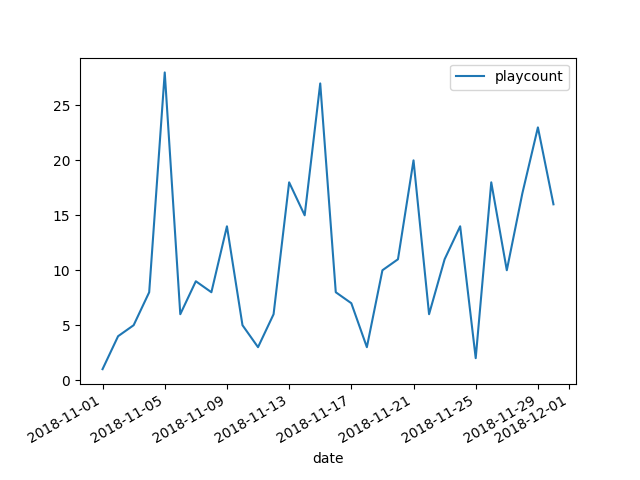

In [13]:
# create a pandas datetime column from extracted year, month and day columns
df_by_date['date'] = df_by_date.apply(lambda row: dt.datetime(row[0], row[1], row[2]), axis=1)

# visualize the data
plt.clf()
df_by_date.plot(kind="line", x="date",y="playcount")
%matplot plt

### Songs played by hour

In [14]:
df_by_hour = spark.sql("""
    SELECT
        t.hour,
        COUNT(s.song_id) as playcount
    FROM 
        songplays s
    INNER JOIN
        time t ON (s.start_time=t.start_time)
    GROUP BY
        t.hour
""").toPandas()

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

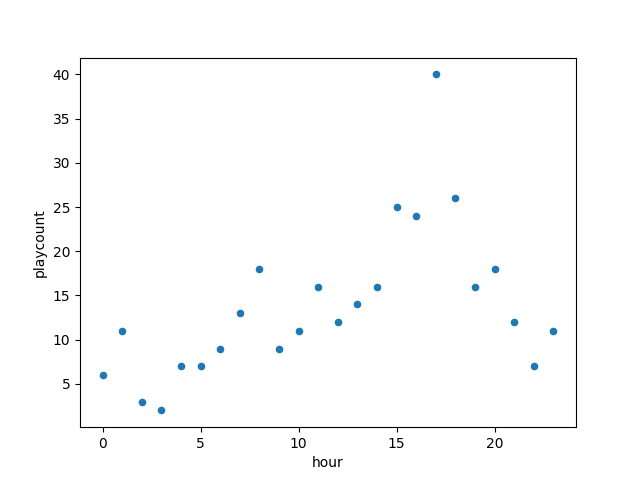

In [15]:
plt.clf()
df_by_hour.plot(kind="scatter", x="hour",y="playcount")
%matplot plt